In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import IsolationForest  
import numpy as np



In [3]:
df = pd.read_csv('/Users/dgrizz/Desktop/Credit_Card_Fraud/Credit Fraud Analysis/fraud_test_extended.csv')
df.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years,distance_km,region
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968-03-19,2020-06-21 12:14:00,56.114044,1.551148,Southeast
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990-01-17,2020-06-21 12:14:00,34.267469,1.666594,Rocky Mountain
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970-10-21,2020-06-21 12:14:00,53.522263,1.387472,Mideast
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987-07-25,2020-06-21 12:15:00,36.752400,1.599663,Southeast
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955-07-06,2020-06-21 12:15:00,68.826373,1.408470,Great Lakes


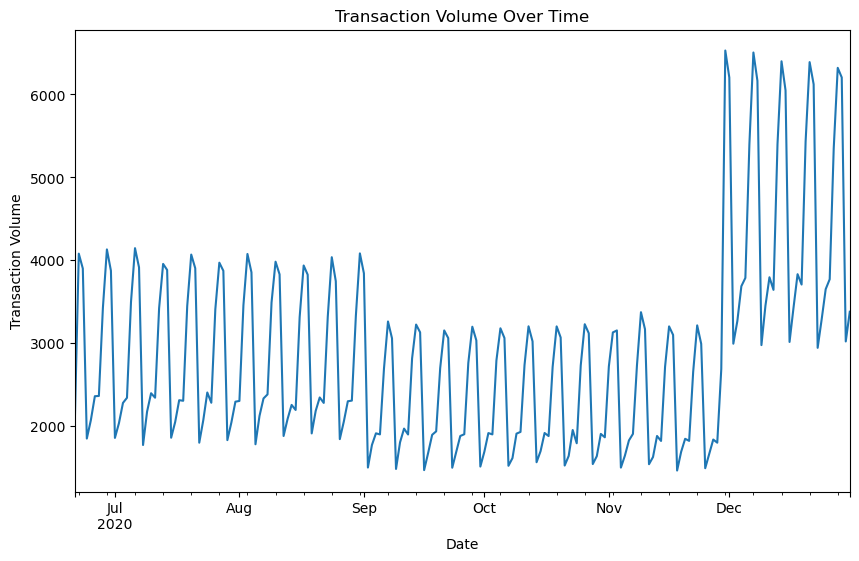

In [6]:
# Convert 'Trans_date_trans_time' to datetime format
df['Trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Group transactions by date (e.g., day, week, month) and count the number of transactions
transaction_volume = df.resample('D', on='Trans_date_trans_time').size()

# Plot the transaction volume over time
plt.figure(figsize=(10, 6))
transaction_volume.plot()
plt.title('Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.show()


In [ ]:
The 'Transaction Volume Over Time' chart exhibits a clear cyclical pattern, indicating weekly fluctuations
in transaction volume. Peaks might correspond with weekends or paydays when consumers are more likely to spend.
The rising trend towards the year's end suggests increased spending during the holiday season.

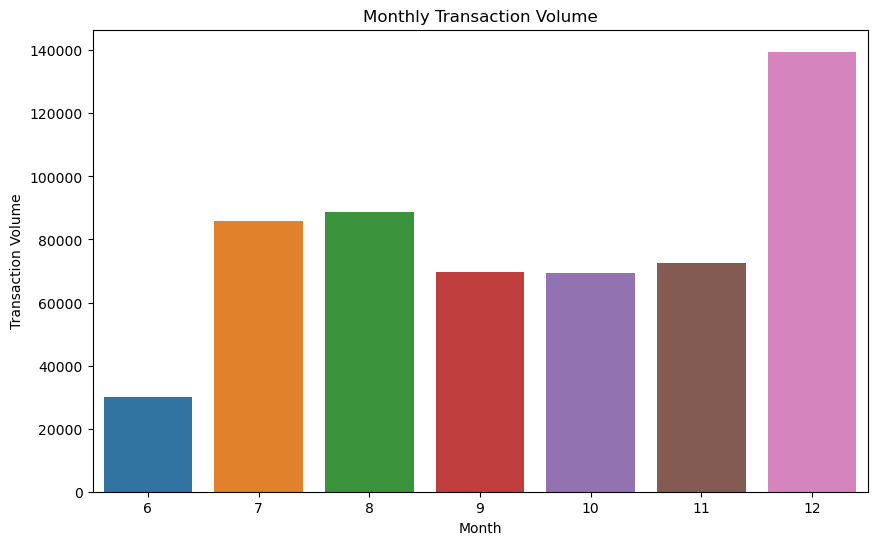

In [7]:
# Extract features like month or season from the transaction date
df['Month'] = df['trans_date_trans_time'].dt.month

# Aggregate transaction volume based on these features
monthly_transaction_volume = df.groupby('Month').size()

# Visualize the seasonal patterns using line or bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_transaction_volume.index, y=monthly_transaction_volume.values)
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.show()


In [ ]:
The 'Monthly Transaction Volume' chart reinforces the idea of increased end-of-year spending with a
dramatic spike in December, likely due to holiday shopping.

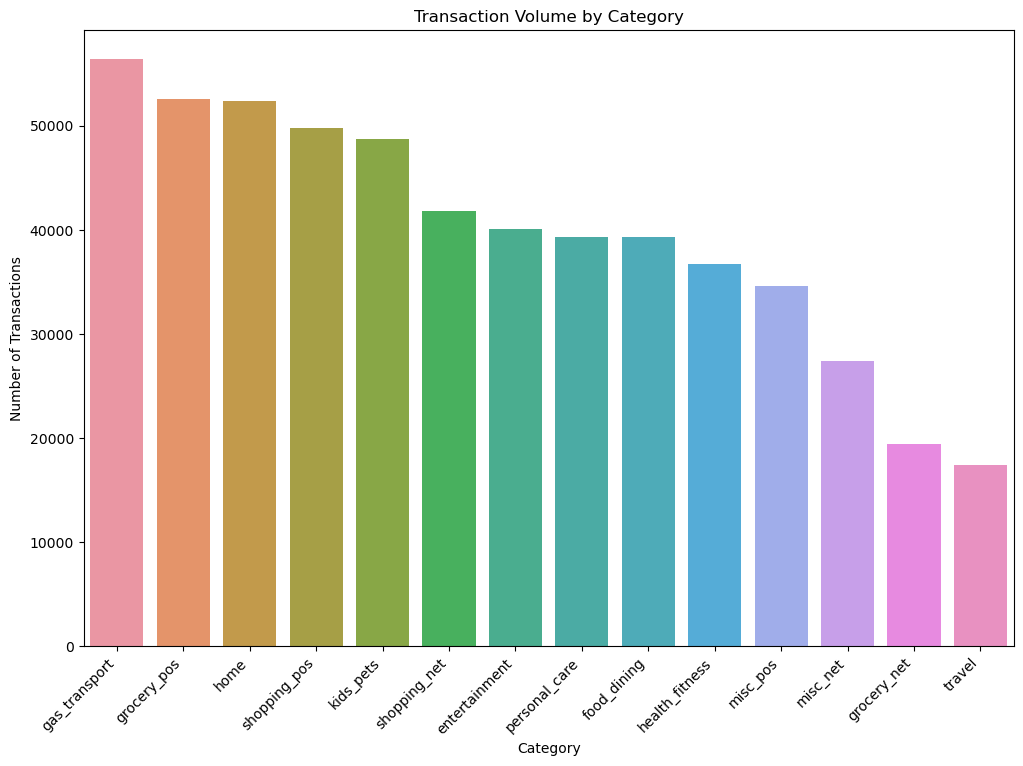

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['month'] = df['trans_date_trans_time'].dt.month

# Grouping by Category
category_volume = df.groupby('category')['trans_num'].count().reset_index()
category_volume.columns = ['category', 'transaction_count']

# Grouping by Merchant
merchant_volume = df.groupby('merchant')['trans_num'].count().reset_index()
merchant_volume.columns = ['merchant', 'transaction_count']

# Section 6: Visualize Transaction Volume by Category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_volume.sort_values('transaction_count', ascending=False), x='category', y='transaction_count')
plt.title('Transaction Volume by Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()


In [ ]:
The 'Transaction Volume by Category' chart shows a distribution where categories like 'gas_transport',
'grocery_pos', and 'home' lead in transaction counts. This may reflect everyday consumer spending patterns,
as these categories are typically associated with regular purchases.

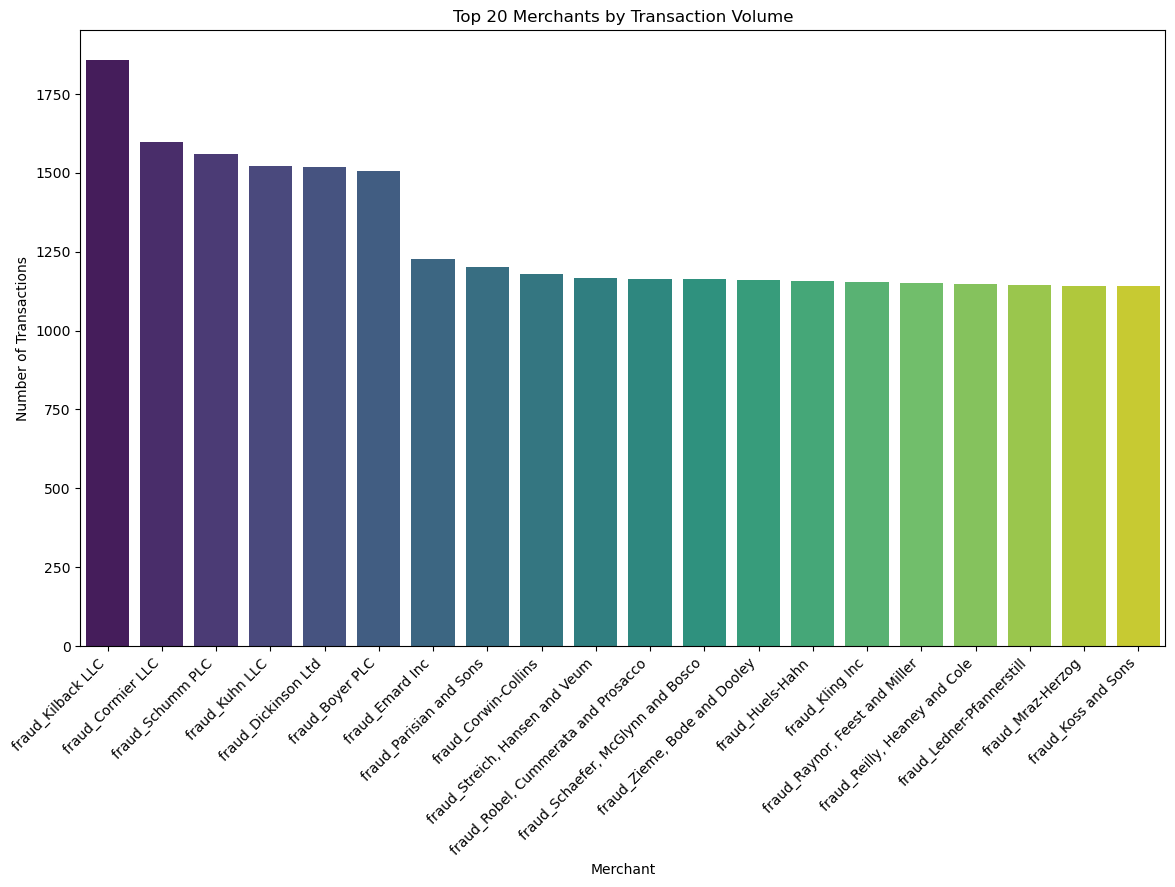

In [11]:
# Visualize Transaction Volume by Merchant (Top 20)
top_n = 20
sorted_merchant_volume = merchant_volume.sort_values('transaction_count', ascending=False).head(top_n)
plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_merchant_volume, x='merchant', y='transaction_count', palette='viridis')
plt.title('Top 20 Merchants by Transaction Volume')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
The 'Top 20 Merchants by Transaction Volume' chart highlights merchants with high transaction volumes,
which could be due to several factors such as widespread locations, diverse offerings,
or competitive pricing strategies that attract more customers.

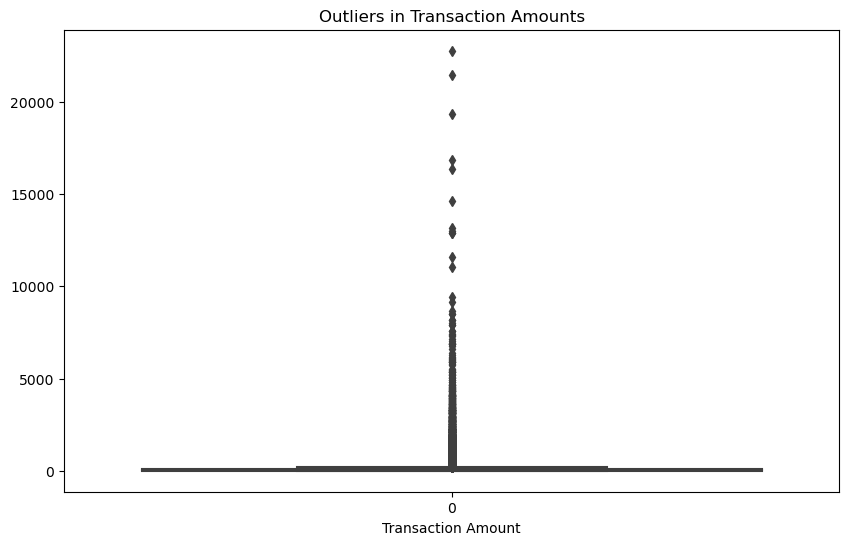

In [13]:
# Identify outliers using statistical methods Z-score or IQR
#using Z-score:
z_scores = (df['amt'] - df['amt'].mean()) / df['amt'].std()
outliers = df[abs(z_scores) > 3]

# Visualize outliers using box plots or scatter plots
plt.figure(figsize=(10, 6))
sns.boxplot(df['amt'])
plt.title('Outliers in Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()


In [ ]:
The 'Outliers in Transaction Amounts' chart reveals that while most transactions fall within a lower range,
there are significant outliers. These could indicate large purchases or possible fraudulent activity,
necessitating further investigation.

In [15]:
# Filter for fraudulent transactions
fraud_transactions = df[df['is_fraud'] == 1]

# Group by merchant and count the number of fraudulent transactions
top_fraud_merchants = fraud_transactions.groupby('merchant')['trans_num'].count().reset_index()

# Sort the merchants by fraudulent transaction count and take the top 10
top_fraud_merchants = top_fraud_merchants.sort_values('trans_num', ascending=False).head(10)
top_fraud_merchants.columns = ['merchant', 'fraudulent_transactions']


In [16]:
# Get the total number of transactions for these merchants
total_transactions_by_merchant = df.groupby('merchant')['trans_num'].count().reset_index()

# Merge the total transactions with the fraudulent transactions for these top merchants
comparison_df = pd.merge(total_transactions_by_merchant, top_fraud_merchants, on='merchant', how='inner')

# Calculate the percentage of fraudulent transactions
comparison_df['fraud_percentage'] = (comparison_df['fraudulent_transactions'] / comparison_df['trans_num']) * 100


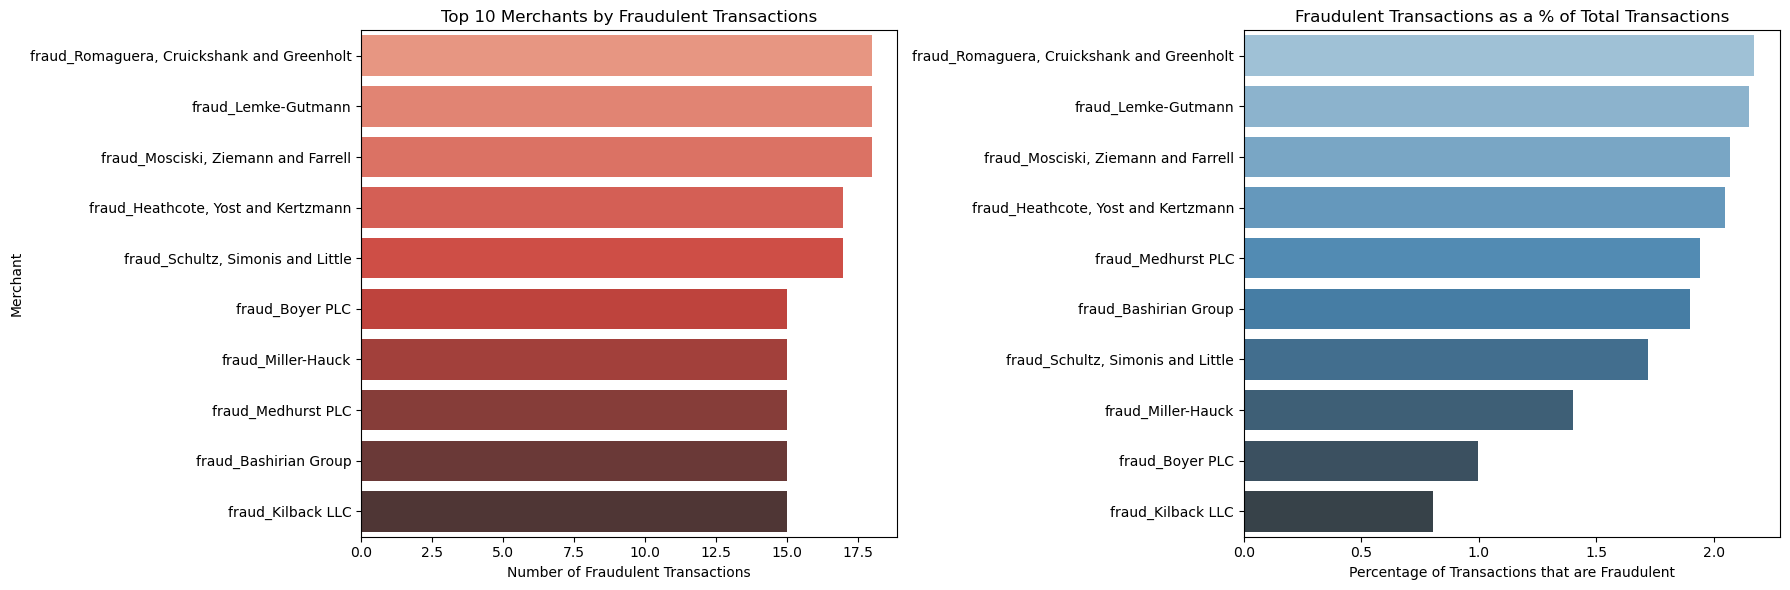

In [18]:
comparison_df_sorted = comparison_df.sort_values('fraud_percentage', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Real terms: Number of fraudulent transactions
sns.barplot(x='fraudulent_transactions', y='merchant', data=top_fraud_merchants, ax=axes[0], palette='Reds_d')
axes[0].set_title('Top 10 Merchants by Fraudulent Transactions')
axes[0].set_xlabel('Number of Fraudulent Transactions')
axes[0].set_ylabel('Merchant')

# Percentage terms: Fraudulent transactions as a percentage of total transactions
# sorted DataFrame
sns.barplot(x='fraud_percentage', y='merchant', data=comparison_df_sorted, ax=axes[1], palette='Blues_d')
axes[1].set_title('Fraudulent Transactions as a % of Total Transactions')
axes[1].set_xlabel('Percentage of Transactions that are Fraudulent')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
Top 10 Merchants by Fraudulent Transactions
In the chart showing 'Top 10 Merchants by Fraudulent Transactions', we see that fraud
isn't uniformly distributed across merchants. Certain merchants like 'fraud_Romaguera,
Cruickshank and Greenholt' have higher instances of fraud, which may suggest either targeted attacks by fraudsters
or potential vulnerabilities in the merchant's transaction processing systems.

Fraudulent Transactions as a Percentage of Total Transactions
Finally, the chart 'Fraudulent Transactions as a % of Total Transactions' offers a different perspective,
showing that while some merchants may have a high number of fraudulent transactions in absolute terms,
it represents a smaller fraction of their total transaction volume. Conversely, other merchants have a higher
percentage of their transactions flagged as fraudulent, which could be concerning despite a lower overall number
of transactions.

In [ ]:
The transaction data reveals everyday consumer spending patterns, with categories like 'gas_transport' and 'grocery_pos' leading in volume, indicative of routine purchases. Seasonal spikes in transaction volume, especially in December, suggest heightened spending around the holiday season.

There is a pronounced weekly rhythm to transaction volumes, with likely increases on weekends or paydays. The distribution of transaction amounts shows that while most are low, there are noteworthy outliers, which could signal large purchases or potential fraudulent activity.

The charts related to fraudulent transactions indicate that fraud is not evenly spread across all merchants. Some, like 'fraud_Romaguera, Cruickshank and Greenholt', have a higher number of fraud cases, which may point to vulnerabilities in their payment systems or a higher risk of targeted fraud.

Lastly, while some merchants experience a high volume of fraudulent transactions, for others, even a small number of fraud cases represent a significant percentage of their total transactions. This could imply a need for improved security measures.

In summary, this analysis provides valuable insights into consumer behavior and fraud risk, which can guide merchants in risk mitigation and strategic planning.

In [ ]:
Demographics for Fraud

In [20]:
# Age
df['dob'] = pd.to_datetime(df['dob'], dayfirst=True)
current_year = pd.to_datetime('today').year
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = current_year - df['dob'].dt.year

# Filter for fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

# Find the most common age among fraudulent transactions
age_counts = fraud_df['age'].value_counts().head(10)



In [21]:
# Find the most common job titles among fraudulent transactions
job_counts = fraud_df['job'].value_counts().head(10)


In [22]:
# Group by gender and calculate fraud rates
gender_fraud_rates = df.groupby('gender')['is_fraud'].mean().reset_index()


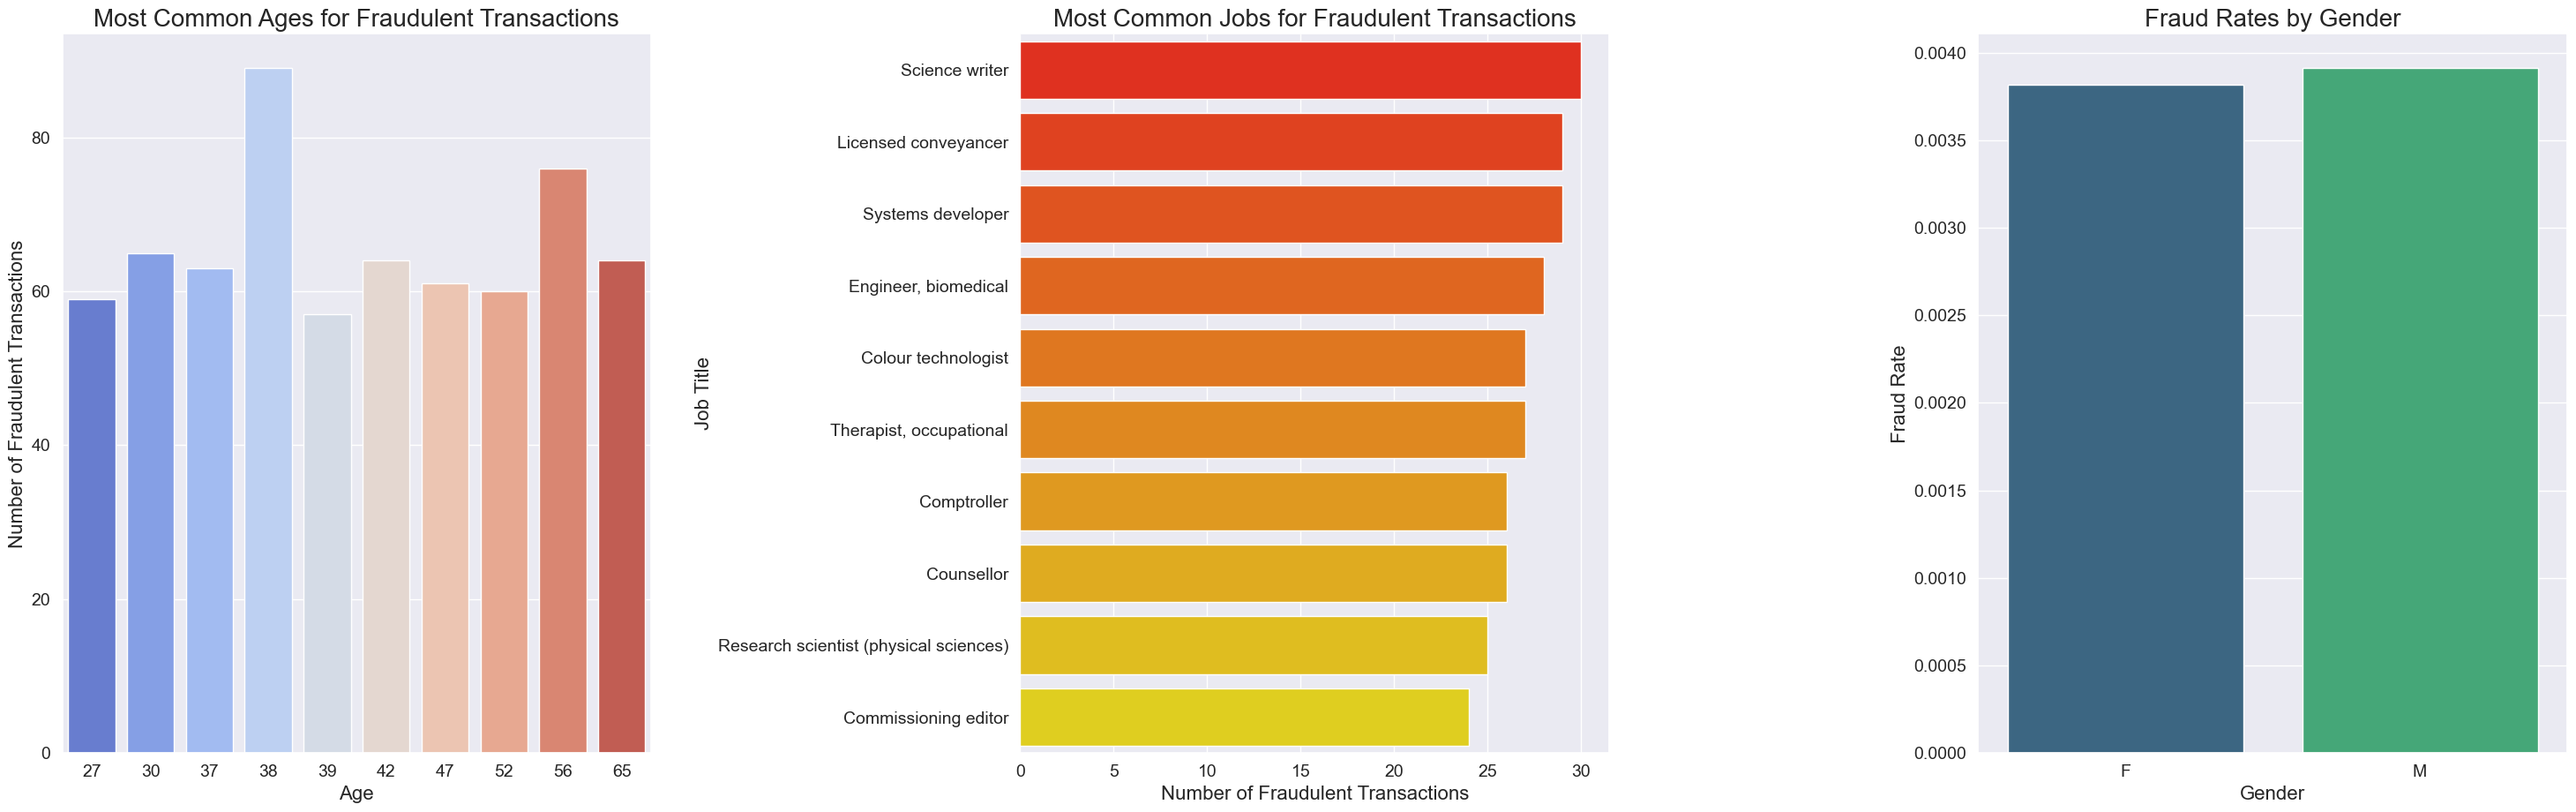

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Most common age for fraud
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[0], palette='coolwarm')
axes[0].set_title('Most Common Ages for Fraudulent Transactions', fontsize=20)  # Bigger title font
axes[0].set_xlabel('Age', fontsize=16)  # Bigger axis label font
axes[0].set_ylabel('Number of Fraudulent Transactions', fontsize=16)
axes[0].tick_params(labelsize=14)  # Bigger tick labels

# Most common job for fraud
sns.barplot(y=job_counts.index, x=job_counts.values, ax=axes[1], palette='autumn')
axes[1].set_title('Most Common Jobs for Fraudulent Transactions', fontsize=20)
axes[1].set_xlabel('Number of Fraudulent Transactions', fontsize=16)
axes[1].set_ylabel('Job Title', fontsize=16)
axes[1].tick_params(labelsize=14)

# Fraud rates by gender
sns.barplot(x='gender', y='is_fraud', data=gender_fraud_rates, ax=axes[2], palette='viridis')
axes[2].set_title('Fraud Rates by Gender', fontsize=20)
axes[2].set_xlabel('Gender', fontsize=16)
axes[2].set_ylabel('Fraud Rate', fontsize=16)
axes[2].tick_params(labelsize=14)

plt.tight_layout(pad=3.0)  # Adjust the padding between and around subplots

plt.show()

In [28]:
X = df[['amt', 'is_fraud']]  

# Scale the features - important for anomaly detection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), max_features=1.0)
iso_forest.fit(X_scaled)


IsolationForest(contamination=0.01)

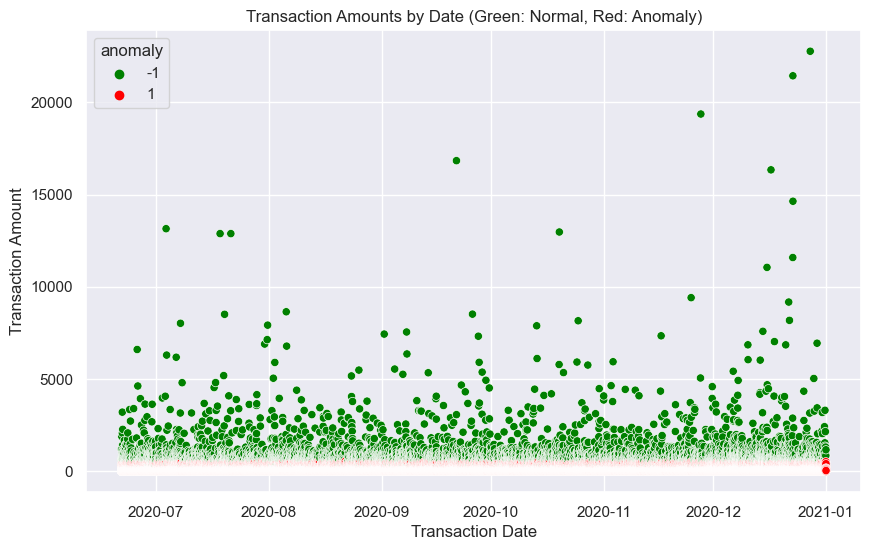

In [30]:
# Predict anomalies
df['scores'] = iso_forest.decision_function(X_scaled)
df['anomaly'] = iso_forest.predict(X_scaled)

# Filter out the anomalies
anomalies = df[df['anomaly'] == -1]

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trans_date_trans_time', y='amt', data=df, hue='anomaly', palette=['green', 'red'], legend='full')
plt.title('Transaction Amounts by Date (Green: Normal, Red: Anomaly)')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.show()


In [ ]:
The scatter plot visualizes transaction amounts over time, distinguishing between normal transactions (green)
and anomalies (red). The anomalies identified by the Isolation Forest model are transactions that 
significantly deviate from the pattern of the majority of the data, which can be seen as those with 
larger transaction amounts.

In [31]:
from sklearn.metrics import classification_report

# Convert anomaly labels from -1/1 to 1/0 (1 for fraud, 0 for normal)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Print the classification report
print(classification_report(df['is_fraud'], df['anomaly']))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.29      0.74      0.42      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.87      0.71    555719
weighted avg       1.00      0.99      0.99    555719

